### Compare cross-validation F1 scores of various (un-tuned) learning algorithms to identify candidates for further consideration & hyperparamter tuning 

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

c:\users\zrankin\appdata\local\continuum\miniconda3\envs\kaggle\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.pipeline import TRANSFORMER_PIPELINE, kfold, f1_scorer
from lib.preprocessing import load_and_process_training_data
from lib.visualization import cv_model, compare_algorithm_cv_scores, plot_algorithm_cv_scores

In [5]:
X_train, y_train = load_and_process_training_data()

In [6]:
algs = [RandomForestClassifier, ExtraTreesClassifier,
        GradientBoostingClassifier, LGBMClassifier, XGBClassifier,
        LinearSVC, GaussianNB, MLPClassifier, LogisticRegressionCV, RidgeClassifierCV, 
       LinearDiscriminantAnalysis, KNeighborsClassifier]

In [7]:
%%time
model_results = compare_algorithm_cv_scores(TRANSFORMER_PIPELINE, algs, X_train, y_train, kfold, f1_scorer)

RandomForestClassifier CV Score: 0.36305 with std: 0.00872
ExtraTreesClassifier CV Score: 0.35246 with std: 0.04338
GradientBoostingClassifier CV Score: 0.35136 with std: 0.03812
LGBMClassifier CV Score: 0.34021 with std: 0.02046
XGBClassifier CV Score: 0.33238 with std: 0.02057
LinearSVC CV Score: 0.29254 with std: 0.03109
GaussianNB CV Score: 0.25542 with std: 0.0333
MLPClassifier CV Score: 0.34145 with std: 0.01764
LogisticRegressionCV CV Score: 0.2551 with std: 0.02528
RidgeClassifierCV CV Score: 0.28288 with std: 0.02753
LinearDiscriminantAnalysis CV Score: 0.33864 with std: 0.02563
KNeighborsClassifier CV Score: 0.33581 with std: 0.00789
Wall time: 1min 11s


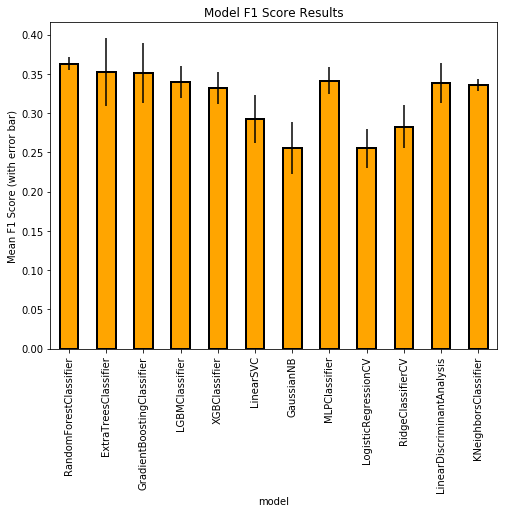

In [8]:
plot_algorithm_cv_scores(model_results)